# Wine Quality Dataset

### Origem do Dataset

- [*Kaggle - Wine Quality*](https://www.kaggle.com/datasets/rajyellow46/wine-quality/data)
- [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality)

#### Dataset Preparado

Após a última etapa, foram geradas versões preparadas do dataset supracitado, visando otimizar o treinamento de potenciais modelos. Os datasets preparados podem ser encontrados em [Repositório do *GitHub*](https://github.com/guilherme-puida/ia/tree/main/datasets/wine_quality/prepared).

### Atribuições

O dataset utilizado foi disponibilizado em página da [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality) sob a licença *CC BY 4.0*. As atribuições de autores se encontram no mesmo *site* supracitado. O dataset possui *paper* introdutório sob autoria de [CORTEZ et al (2009)](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

CORTEZ, Paulo; ANTÓNIO CERDEIRA; ALMEIDA, Fernando; et al. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, v. 47, n. 4, p. 547–553, 2009. Disponível em: <https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub>.

### Objetivo

Esse notebook visa selecionar os modelos de maior potencial para o presente dataset.

In [637]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

all_wines = pd.read_csv('/content/prepared_wine_quality_all_wines.csv')
red_wines = pd.read_csv('/content/prepared_wine_quality_red_wines.csv')
white_wines = pd.read_csv('/content/prepared_wine_quality_white_wines.csv')

In [638]:
# reposicionando a coluna "type"

cols = ["fixed acidity", "volatile acidity",	"citric acid",	"residual sugar", "chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density", "pH", "sulphates",	"alcohol", "type", "quality"]
all_wines = all_wines.reindex(columns=cols)

display(all_wines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Red,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,White,6
6423,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,White,5
6424,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,White,6
6425,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,White,7


## Regressão Linear Múltipla

Primeiramente, dada a quantidade de variáveis (quase todas numéricas) de nosso *dataset* e a necessidade de encontrar um valor adequado para a qualidade (variável também numérica), iremos aplicar o conceito de regressão linear múltipla.

Em um primeiro momento, consideraremos os valores da coluna "type" enquanto valores numéricos, sendo "Red" igual a 0 e "White" igual a 1.

Além disso, apenas para fins de comparação, os valores referentes à qualidade no dataset original serão convertidos para o tipo *float*.

In [639]:
# Convertendo os valores da coluna "type" para a forma numérica

new_all_wines = all_wines # as alterações não serão realizadas no dataset original
new_all_wines['type'] = new_all_wines['type'].apply(lambda t: 0 if t == "Red" else 1)

# Convertendo os valores da coluna "quality" para o tipo *float*
new_all_wines['quality'] = new_all_wines['quality'].astype(float)

In [640]:
# separando as variáveis independentes

X = new_all_wines.iloc[:, :-1].values
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  0.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  0.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  0.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  1.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  1.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  1.  ]])

In [641]:
# separando a variável dependente

y = new_all_wines['quality'].values
y

array([5., 5., 5., ..., 6., 7., 6.])

In [642]:
# separando as variáveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [643]:
# treinando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [644]:
# aplicando o modelo nas variáveis de teste

y_pred = model.predict(X_test)

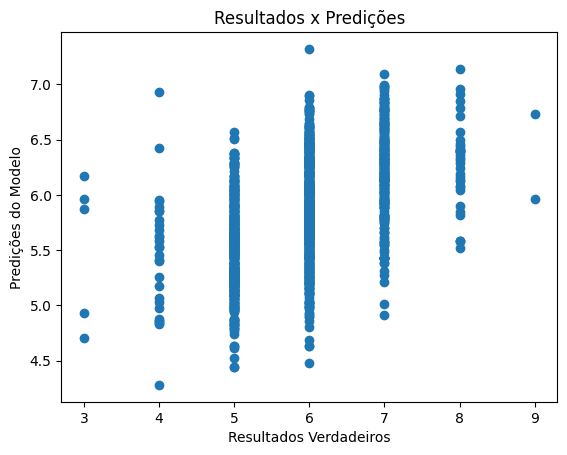

In [645]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições")
plt.show()

In [646]:
# Desempenho do modelo

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")

Erro Quadrático Médio: 0.552385144543777
Erro Absoluto Médio: 0.5789328470094429


Agora, iremos plotar alguns gráficos bidimensionais representando a relação de cada variável com a qualidade obtida:

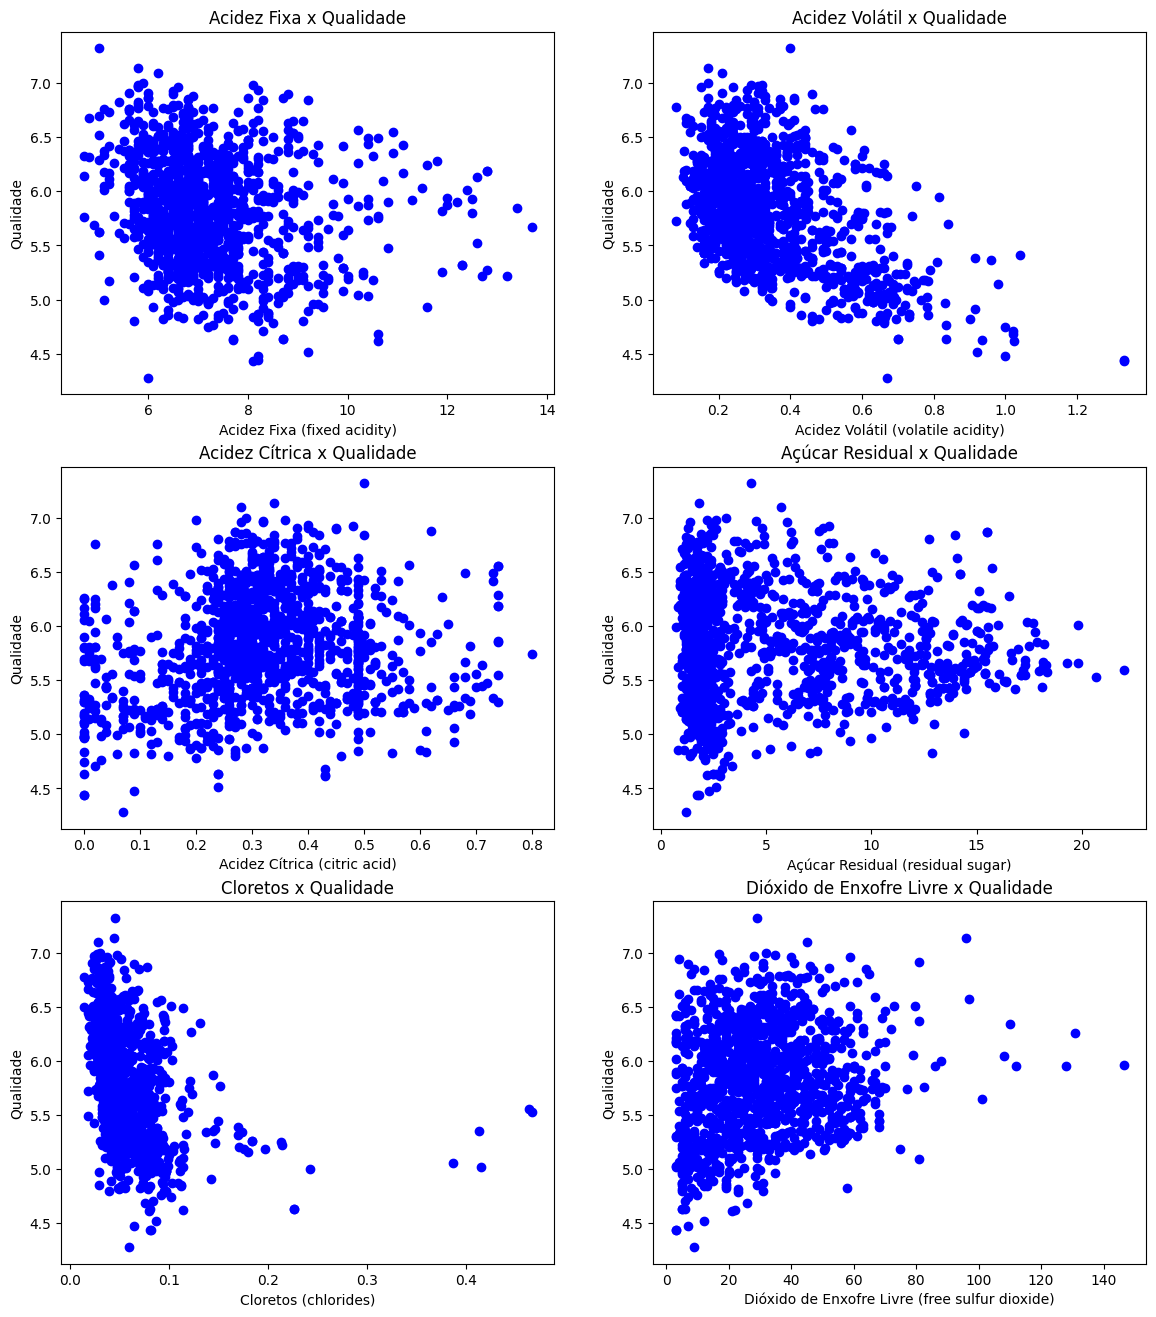

In [647]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 0], y_pred, color='blue')
axs[0, 0].set_xlabel('Acidez Fixa (fixed acidity)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Acidez Fixa x Qualidade')

axs[0, 1].scatter(X_test[:, 1], y_pred, color='blue')
axs[0, 1].set_xlabel('Acidez Volátil (volatile acidity)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Acidez Volátil x Qualidade')

axs[1, 0].scatter(X_test[:, 2], y_pred, color='blue')
axs[1, 0].set_xlabel('Acidez Cítrica (citric acid)')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('Acidez Cítrica x Qualidade')

axs[1, 1].scatter(X_test[:, 3], y_pred, color='blue')
axs[1, 1].set_xlabel('Açúcar Residual (residual sugar)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Açúcar Residual x Qualidade')

axs[2, 0].scatter(X_test[:, 4], y_pred, color='blue')
axs[2, 0].set_xlabel('Cloretos (chlorides)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Cloretos x Qualidade')

axs[2, 1].scatter(X_test[:, 5], y_pred, color='blue')
axs[2, 1].set_xlabel('Dióxido de Enxofre Livre (free sulfur dioxide)')
axs[2, 1].set_ylabel('Qualidade')
axs[2, 1].set_title('Dióxido de Enxofre Livre x Qualidade')

plt.show()

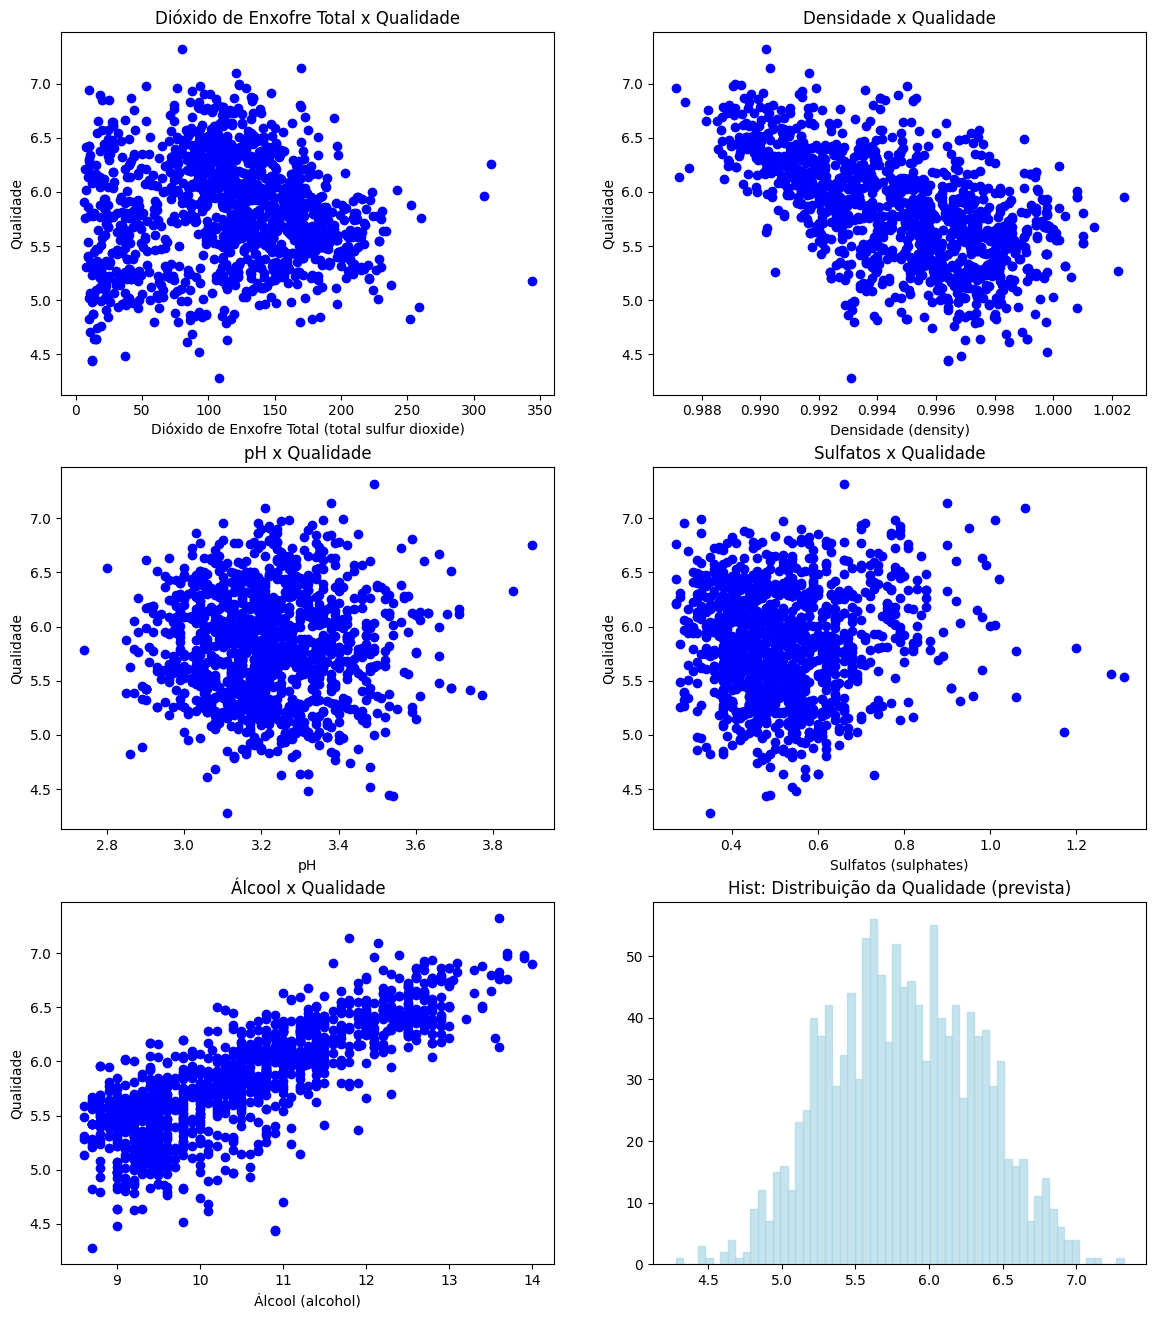

In [648]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 6], y_pred, color='blue')
axs[0, 0].set_xlabel('Dióxido de Enxofre Total (total sulfur dioxide)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Dióxido de Enxofre Total x Qualidade')

axs[0, 1].scatter(X_test[:, 7], y_pred, color='blue')
axs[0, 1].set_xlabel('Densidade (density)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Densidade x Qualidade')

axs[1, 0].scatter(X_test[:, 8], y_pred, color='blue')
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('pH x Qualidade')

axs[1, 1].scatter(X_test[:, 9], y_pred, color='blue')
axs[1, 1].set_xlabel('Sulfatos (sulphates)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Sulfatos x Qualidade')

axs[2, 0].scatter(X_test[:, 10], y_pred, color='blue')
axs[2, 0].set_xlabel('Álcool (alcohol)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Álcool x Qualidade')

axs[2, 1].hist(y_pred, bins=60, color='lightblue', edgecolor='lightblue', alpha=0.7)
axs[2, 1].set_title('Hist: Distribuição da Qualidade (prevista)')

plt.show()

Observando os gráficos gerados acima, é possível observar como cada atributo impacta sobre a qualidade prevista, permitindo assim uma possível otimização do modelo no futuro.

Agora, aplicaremos o mesmo modelo de maneira separada para vinhos vermelhos e vinhos brancos, de modo a verificar qual a melhor forma de se lidar com os diferentes tipos de vinho.

### Regressão Linear - Vinhos Vermelhos

In [649]:
display(red_wines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1564,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1565,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1566,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1567,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [650]:
# separando as variáveis independentes

X = red_wines.iloc[:, :-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [651]:
# separando a variável dependente

y = red_wines['quality'].values
y

array([5, 5, 5, ..., 6, 5, 6])

In [652]:
# separando as variáveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [653]:
# treinando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [654]:
# aplicando o modelo nas variáveis de teste

y_pred = model.predict(X_test)

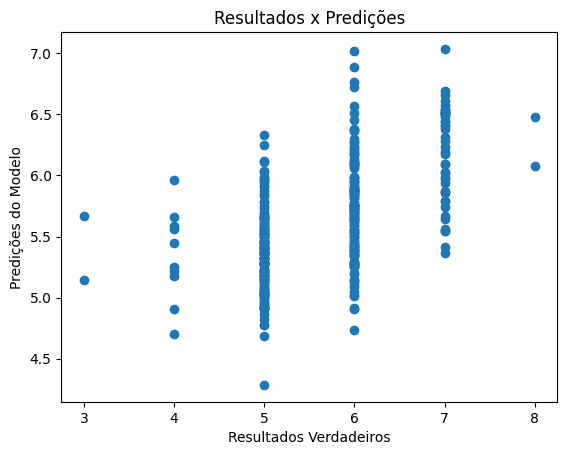

In [655]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições")
plt.show()

In [656]:
# Desempenho do modelo

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")

Erro Quadrático Médio: 0.44666617272853437
Erro Absoluto Médio: 0.5227722234101663


Agora, iremos plotar alguns gráficos bidimensionais representando a relação de cada variável com a qualidade obtida:

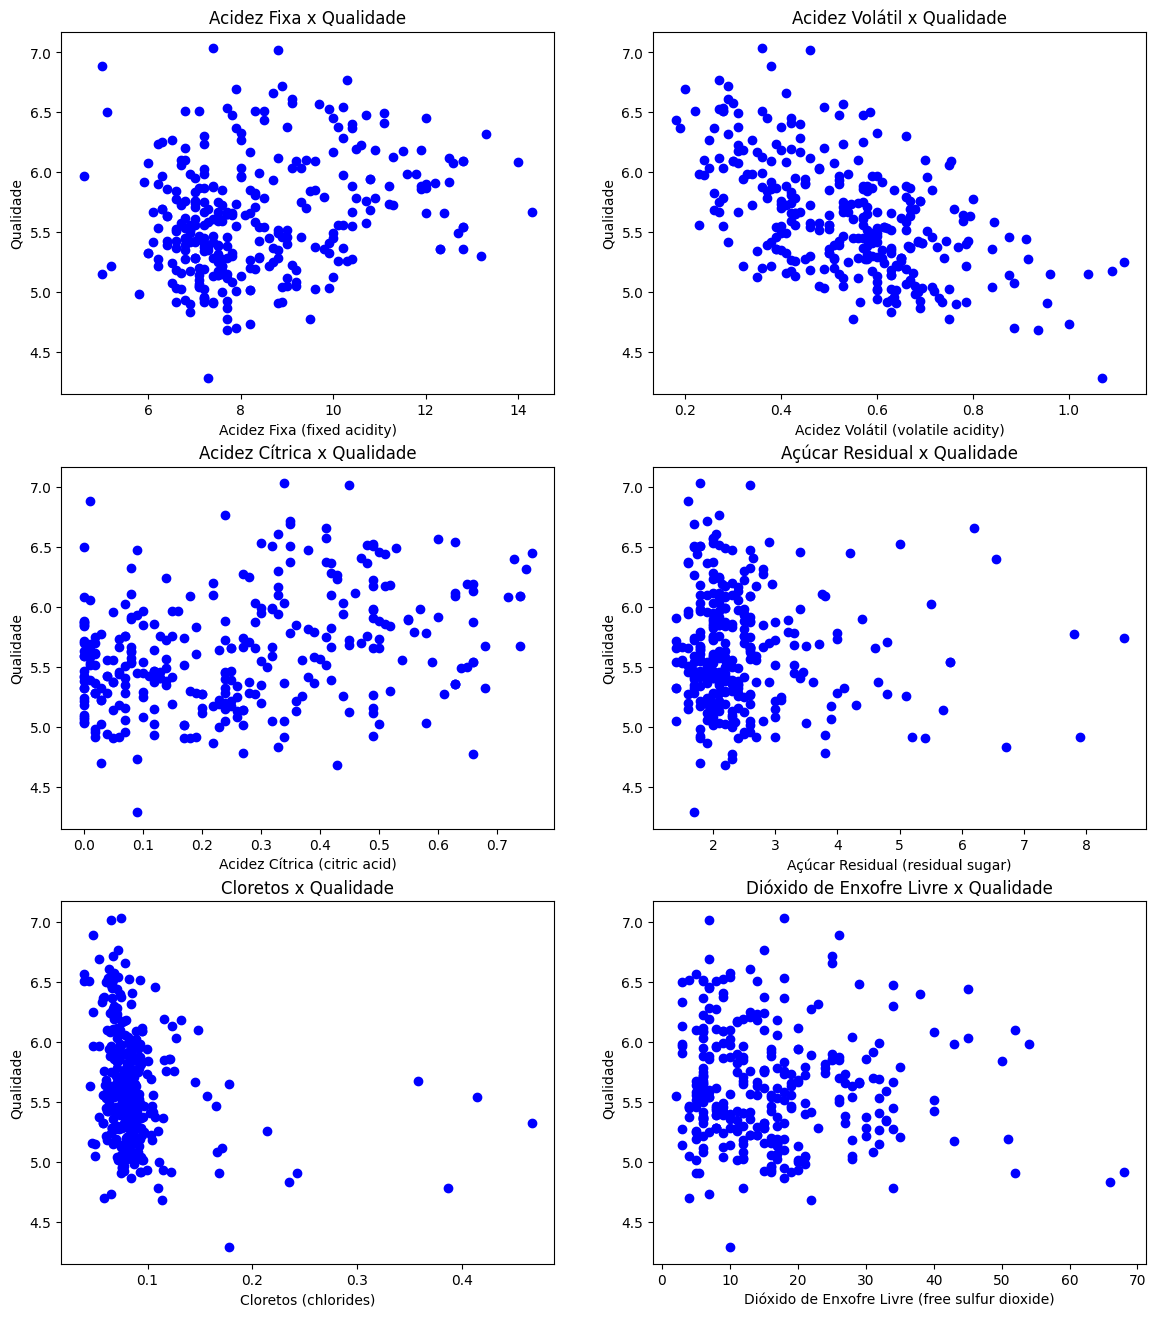

In [657]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 0], y_pred, color='blue')
axs[0, 0].set_xlabel('Acidez Fixa (fixed acidity)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Acidez Fixa x Qualidade')

axs[0, 1].scatter(X_test[:, 1], y_pred, color='blue')
axs[0, 1].set_xlabel('Acidez Volátil (volatile acidity)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Acidez Volátil x Qualidade')

axs[1, 0].scatter(X_test[:, 2], y_pred, color='blue')
axs[1, 0].set_xlabel('Acidez Cítrica (citric acid)')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('Acidez Cítrica x Qualidade')

axs[1, 1].scatter(X_test[:, 3], y_pred, color='blue')
axs[1, 1].set_xlabel('Açúcar Residual (residual sugar)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Açúcar Residual x Qualidade')

axs[2, 0].scatter(X_test[:, 4], y_pred, color='blue')
axs[2, 0].set_xlabel('Cloretos (chlorides)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Cloretos x Qualidade')

axs[2, 1].scatter(X_test[:, 5], y_pred, color='blue')
axs[2, 1].set_xlabel('Dióxido de Enxofre Livre (free sulfur dioxide)')
axs[2, 1].set_ylabel('Qualidade')
axs[2, 1].set_title('Dióxido de Enxofre Livre x Qualidade')

plt.show()

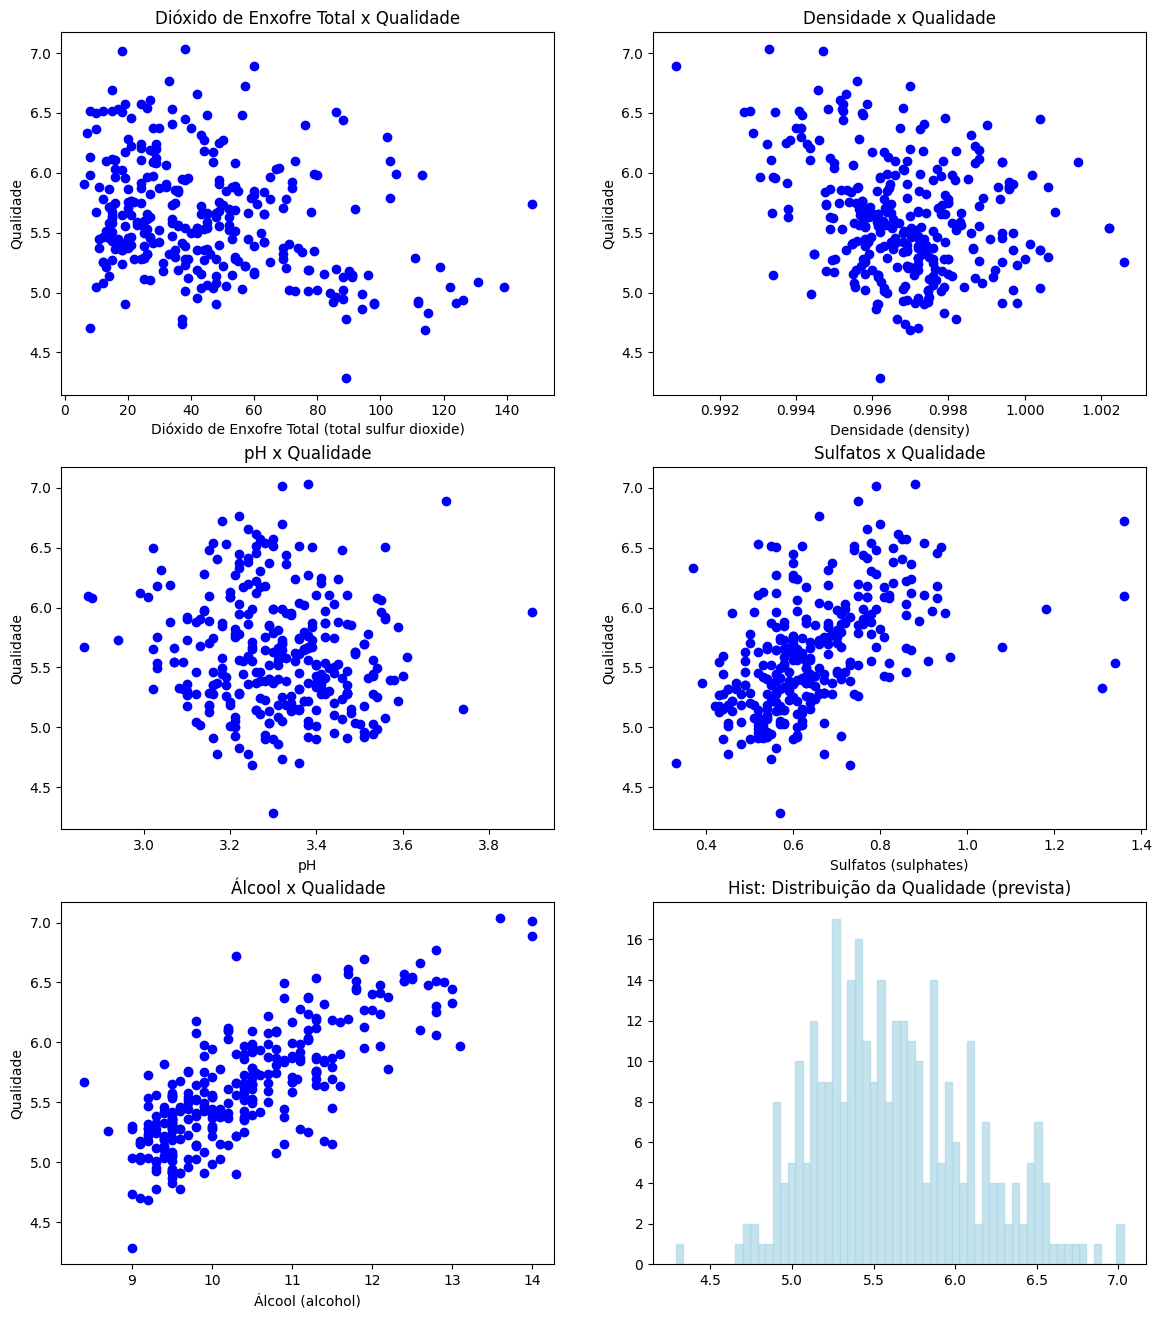

In [658]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 6], y_pred, color='blue')
axs[0, 0].set_xlabel('Dióxido de Enxofre Total (total sulfur dioxide)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Dióxido de Enxofre Total x Qualidade')

axs[0, 1].scatter(X_test[:, 7], y_pred, color='blue')
axs[0, 1].set_xlabel('Densidade (density)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Densidade x Qualidade')

axs[1, 0].scatter(X_test[:, 8], y_pred, color='blue')
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('pH x Qualidade')

axs[1, 1].scatter(X_test[:, 9], y_pred, color='blue')
axs[1, 1].set_xlabel('Sulfatos (sulphates)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Sulfatos x Qualidade')

axs[2, 0].scatter(X_test[:, 10], y_pred, color='blue')
axs[2, 0].set_xlabel('Álcool (alcohol)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Álcool x Qualidade')

axs[2, 1].hist(y_pred, bins=60, color='lightblue', edgecolor='lightblue', alpha=0.7)
axs[2, 1].set_title('Hist: Distribuição da Qualidade (prevista)')

plt.show()

### Regressão Linear - Vinhos Brancos

In [659]:
display(white_wines)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4853,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4854,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4855,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4856,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [660]:
# separando as variáveis independentes

X = white_wines.iloc[:, :-1].values
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [661]:
# separando a variável dependente

y = white_wines['quality'].values
y

array([6, 6, 6, ..., 6, 7, 6])

In [662]:
# separando as variáveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [663]:
# treinando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [664]:
# aplicando o modelo nas variáveis de teste

y_pred = model.predict(X_test)

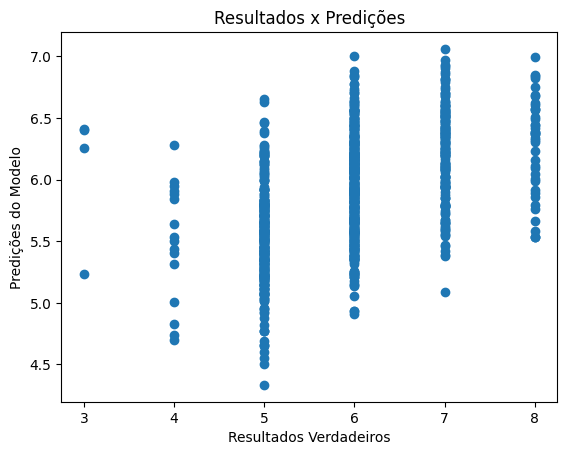

In [665]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições")
plt.show()

In [666]:
# Desempenho do modelo

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred, y_test)}")

Erro Quadrático Médio: 0.5548159986373593
Erro Absoluto Médio: 0.5717321146573497


Agora, iremos plotar alguns gráficos bidimensionais representando a relação de cada variável com a qualidade obtida:

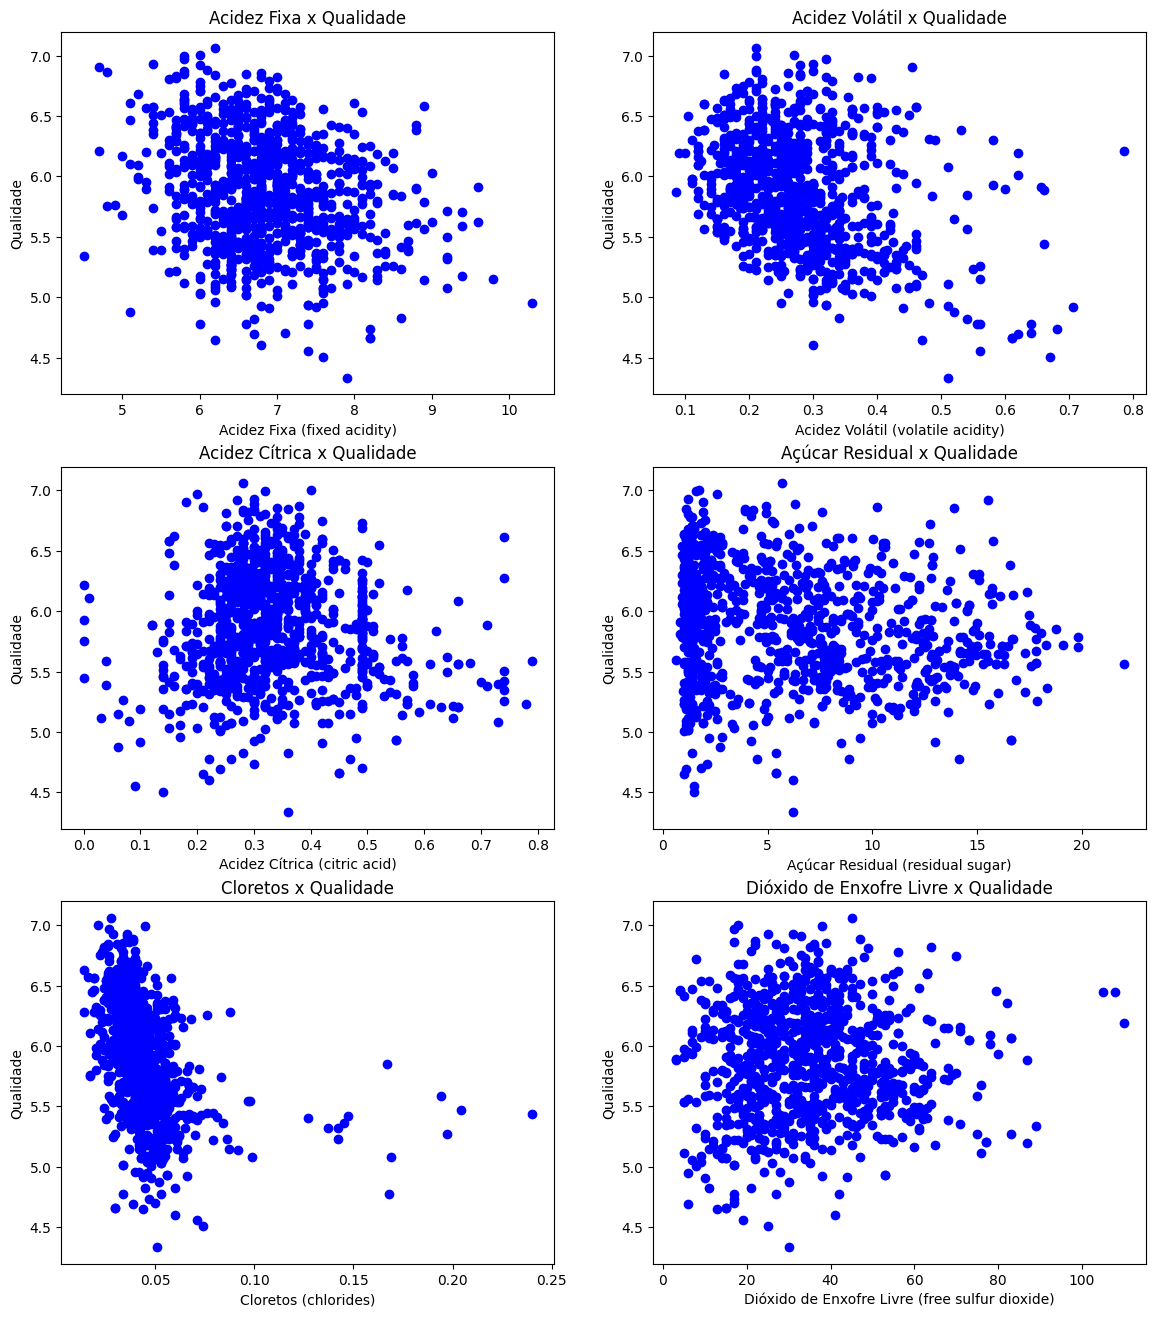

In [667]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 0], y_pred, color='blue')
axs[0, 0].set_xlabel('Acidez Fixa (fixed acidity)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Acidez Fixa x Qualidade')

axs[0, 1].scatter(X_test[:, 1], y_pred, color='blue')
axs[0, 1].set_xlabel('Acidez Volátil (volatile acidity)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Acidez Volátil x Qualidade')

axs[1, 0].scatter(X_test[:, 2], y_pred, color='blue')
axs[1, 0].set_xlabel('Acidez Cítrica (citric acid)')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('Acidez Cítrica x Qualidade')

axs[1, 1].scatter(X_test[:, 3], y_pred, color='blue')
axs[1, 1].set_xlabel('Açúcar Residual (residual sugar)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Açúcar Residual x Qualidade')

axs[2, 0].scatter(X_test[:, 4], y_pred, color='blue')
axs[2, 0].set_xlabel('Cloretos (chlorides)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Cloretos x Qualidade')

axs[2, 1].scatter(X_test[:, 5], y_pred, color='blue')
axs[2, 1].set_xlabel('Dióxido de Enxofre Livre (free sulfur dioxide)')
axs[2, 1].set_ylabel('Qualidade')
axs[2, 1].set_title('Dióxido de Enxofre Livre x Qualidade')

plt.show()

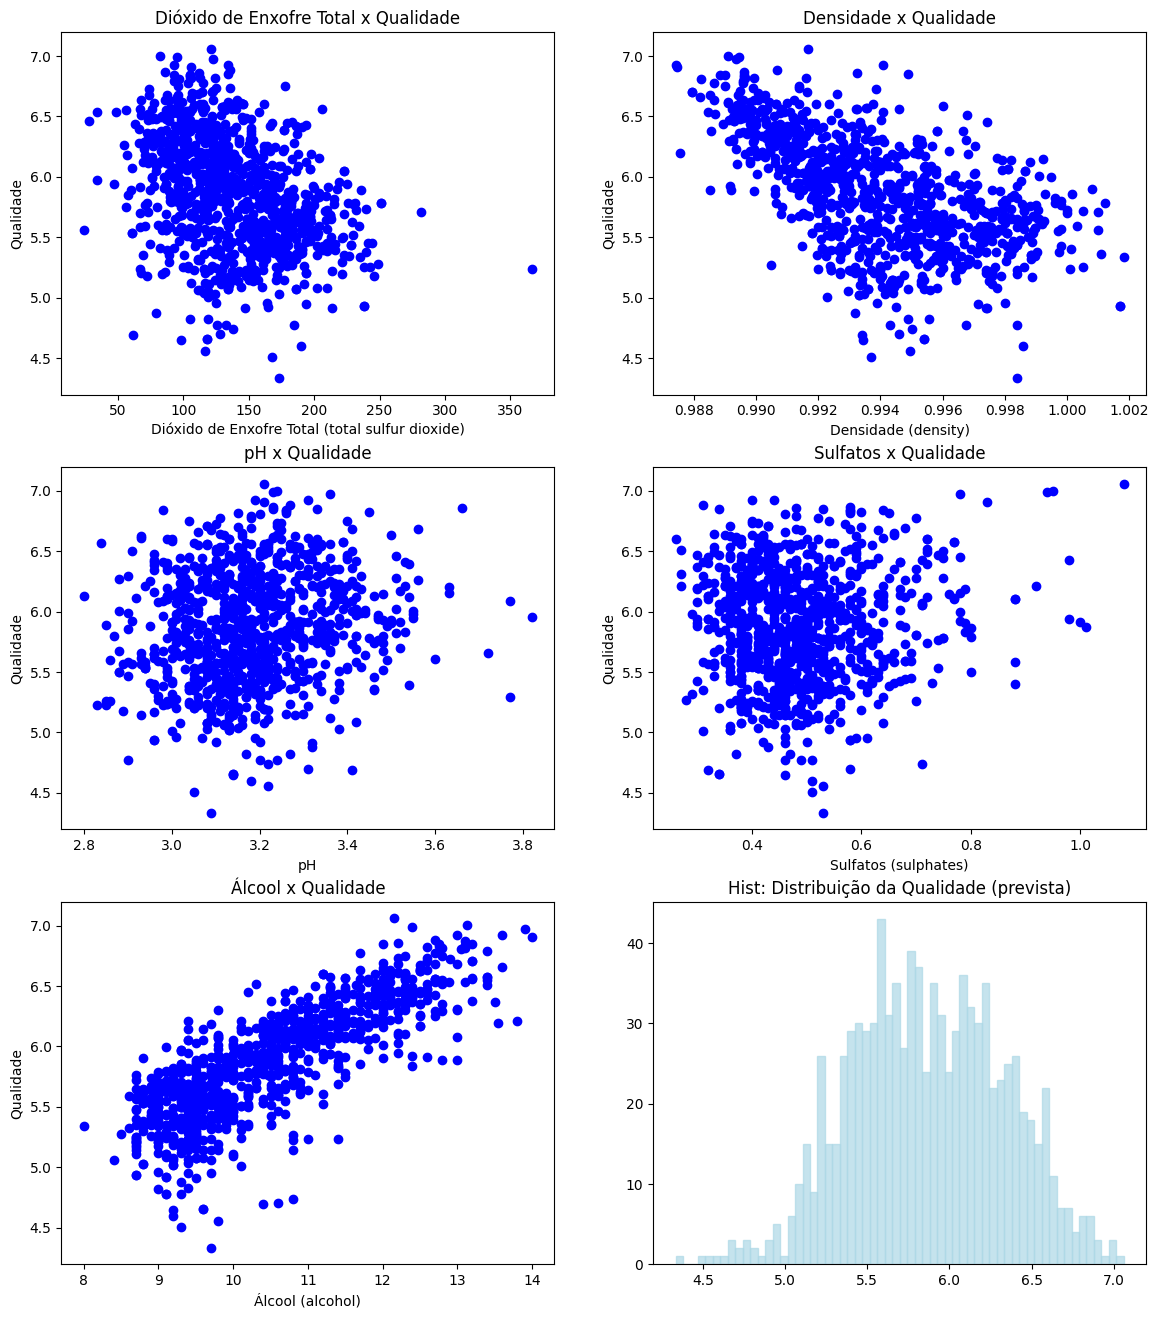

In [668]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))

axs[0, 0].scatter(X_test[:, 6], y_pred, color='blue')
axs[0, 0].set_xlabel('Dióxido de Enxofre Total (total sulfur dioxide)')
axs[0, 0].set_ylabel('Qualidade')
axs[0, 0].set_title('Dióxido de Enxofre Total x Qualidade')

axs[0, 1].scatter(X_test[:, 7], y_pred, color='blue')
axs[0, 1].set_xlabel('Densidade (density)')
axs[0, 1].set_ylabel('Qualidade')
axs[0, 1].set_title('Densidade x Qualidade')

axs[1, 0].scatter(X_test[:, 8], y_pred, color='blue')
axs[1, 0].set_xlabel('pH')
axs[1, 0].set_ylabel('Qualidade')
axs[1, 0].set_title('pH x Qualidade')

axs[1, 1].scatter(X_test[:, 9], y_pred, color='blue')
axs[1, 1].set_xlabel('Sulfatos (sulphates)')
axs[1, 1].set_ylabel('Qualidade')
axs[1, 1].set_title('Sulfatos x Qualidade')

axs[2, 0].scatter(X_test[:, 10], y_pred, color='blue')
axs[2, 0].set_xlabel('Álcool (alcohol)')
axs[2, 0].set_ylabel('Qualidade')
axs[2, 0].set_title('Álcool x Qualidade')

axs[2, 1].hist(y_pred, bins=60, color='lightblue', edgecolor='lightblue', alpha=0.7)
axs[2, 1].set_title('Hist: Distribuição da Qualidade (prevista)')

plt.show()

É perceptível que, comparando o erro quadrático médio obtido a partir do modelo de regressão linear múltipla dos datasets de vinhos vermelhos e vinhos brancos, o modelo treinado para vinhos vermelhos obteve um erro consideravelmente menor (0,446 x 0,554 para vinhos vermelhos e brancos, respectivamente).

Além disso, é possível estabelecer comparações relativas ao quanto cada característica química pode afetar o resultado gerado (qualidade prevista para o vinho) para cada tipo de vinho.